In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
metro_df = pd.read_csv("Metro_Interstate_Traffic_Volume.csv")

In [3]:
metro_df.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [4]:
metro_df.tail()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
48199,None,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543
48200,None,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781
48201,None,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159
48202,None,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450
48203,None,282.12,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 23:00:00,954


In [5]:
metro_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


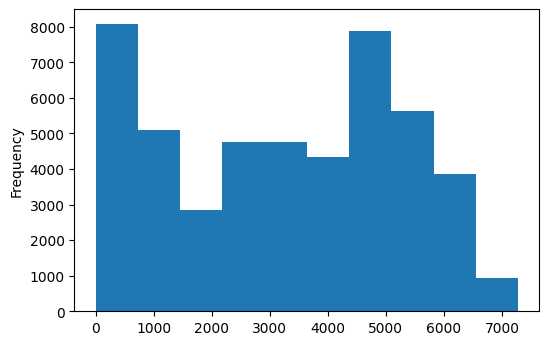

In [6]:
metro_df["traffic_volume"].plot.hist()

In [7]:
metro_df["traffic_volume"].describe()

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

About 25% of the time, there were 1,193 cars or fewer passing the station each hour — this probably occurs during the night, or when a road is under construction.
About 75% of the time, the traffic volume was four times as much (4,933 cars or more).

In [9]:
metro_df["date_time"] = pd.to_datetime(metro_df["date_time"])

In [10]:
day_df = metro_df[(metro_df["date_time"].dt.hour < 19) & (metro_df["date_time"].dt.hour >=7)]
night_df = metro_df[(metro_df["date_time"].dt.hour < 7) | (metro_df["date_time"].dt.hour >= 19)]

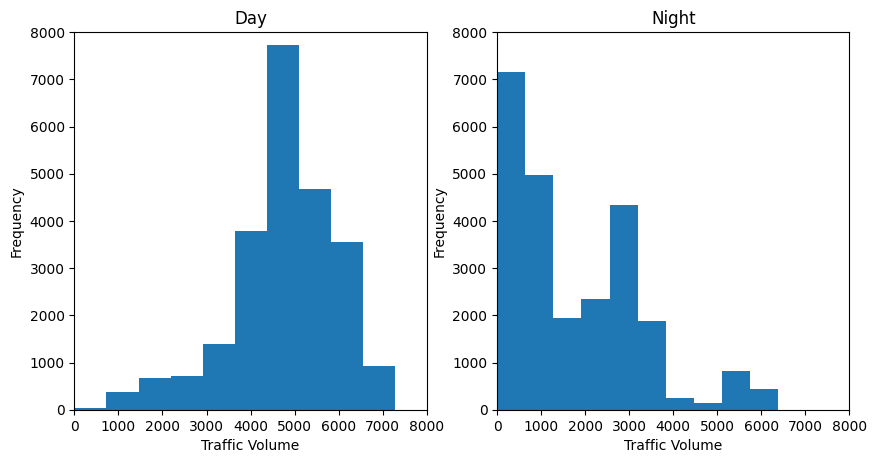

In [11]:
fig, axs = plt.subplots(1, 2, figsize=(10,5))
axs[0].hist(day_df['traffic_volume'])
axs[0].set_title('Day')
axs[0].set_xlabel('Traffic Volume')
axs[0].set_ylabel('Frequency')
axs[0].set_ylim(0,8000)
axs[0].set_xlim(0,8000)
axs[1].hist(night_df['traffic_volume'])
axs[1].set_title('Night')
axs[1].set_xlabel('Traffic Volume')
axs[1].set_ylabel('Frequency')
axs[1].set_ylim(0,8000)
axs[1].set_xlim(0,8000)
plt.show()

In [12]:
day_df['traffic_volume'].describe()

count    23877.000000
mean      4762.047452
std       1174.546482
min          0.000000
25%       4252.000000
50%       4820.000000
75%       5559.000000
max       7280.000000
Name: traffic_volume, dtype: float64

In [13]:
night_df['traffic_volume'].describe()

count    24327.000000
mean      1785.377441
std       1441.951197
min          0.000000
25%        530.000000
50%       1287.000000
75%       2819.000000
max       6386.000000
Name: traffic_volume, dtype: float64

As we see in above histograms the traffic at night is generally light. 
Our goal is to find indicators of heavy traffic, 
so we decided to only focus on the daytime data moving forward.

In [15]:
day_df['month'] = day_df["date_time"].dt.month
by_month = day_df.groupby('month').mean()
by_month['traffic_volume']

<ipython-input-15-1879854234a2>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



month
1     4495.613727
2     4711.198394
3     4889.409560
4     4906.894305
5     4911.121609
6     4898.019566
7     4595.035744
8     4928.302035
9     4870.783145
10    4921.234922
11    4704.094319
12    4374.834566
Name: traffic_volume, dtype: float64

<function matplotlib.pyplot.show(*args, **kw)>

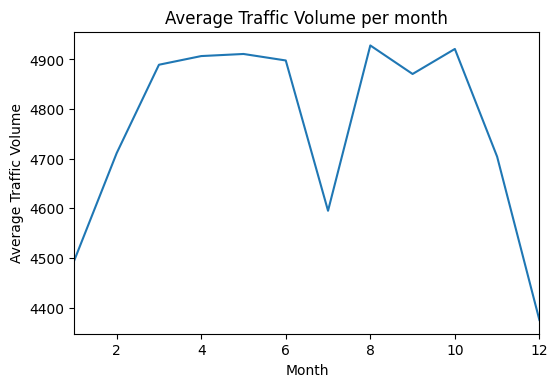

In [16]:
plt.plot(by_month['traffic_volume'])
plt.xlabel('Month')
plt.ylabel('Average Traffic Volume')
plt.title('Average Traffic Volume per month')
plt.xlim(1, 12)
plt.show

In [17]:
day_df['dayofweek'] = day_df['date_time'].dt.dayofweek
by_dayofweek = day_df.groupby('dayofweek').mean()
by_dayofweek['traffic_volume']  # 0 is Monday, 6 is Sunday

<ipython-input-17-6708ca1a7198>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



dayofweek
0    4893.551286
1    5189.004782
2    5284.454282
3    5311.303730
4    5291.600829
5    3927.249558
6    3436.541789
Name: traffic_volume, dtype: float64

<function matplotlib.pyplot.show(*args, **kw)>

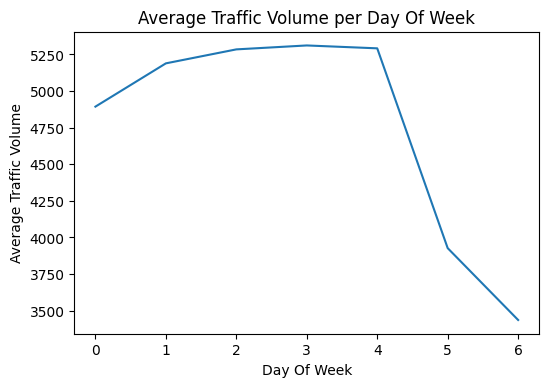

In [18]:
plt.plot(by_dayofweek['traffic_volume'])
plt.xlabel('Day Of Week')
plt.ylabel('Average Traffic Volume')
plt.title('Average Traffic Volume per Day Of Week')
plt.show

We can see traffic volume is significantly heavier on business days compared to the weekends 
its probably because less people are going to work or study

In [20]:
day_df['hour'] = day_df['date_time'].dt.hour
bussiness_days = day_df.copy()[day_df['dayofweek'] <= 4] # 4 == Friday
weekend = day_df.copy()[day_df['dayofweek'] >= 5] # 5 == Saturday
by_hour_business = bussiness_days.groupby('hour').mean()
by_hour_weekend = weekend.groupby('hour').mean()

print(by_hour_business['traffic_volume'])
print(by_hour_weekend['traffic_volume'])

hour
7     6030.413559
8     5503.497970
9     4895.269257
10    4378.419118
11    4633.419470
12    4855.382143
13    4859.180473
14    5152.995778
15    5592.897768
16    6189.473647
17    5784.827133
18    4434.209431
Name: traffic_volume, dtype: float64
hour
7     1589.365894
8     2338.578073
9     3111.623917
10    3686.632302
11    4044.154955
12    4372.482883
13    4362.296564
14    4358.543796
15    4342.456881
16    4339.693805
17    4151.919929
18    3811.792279
Name: traffic_volume, dtype: float64


<ipython-input-20-e2c05eb4035b>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



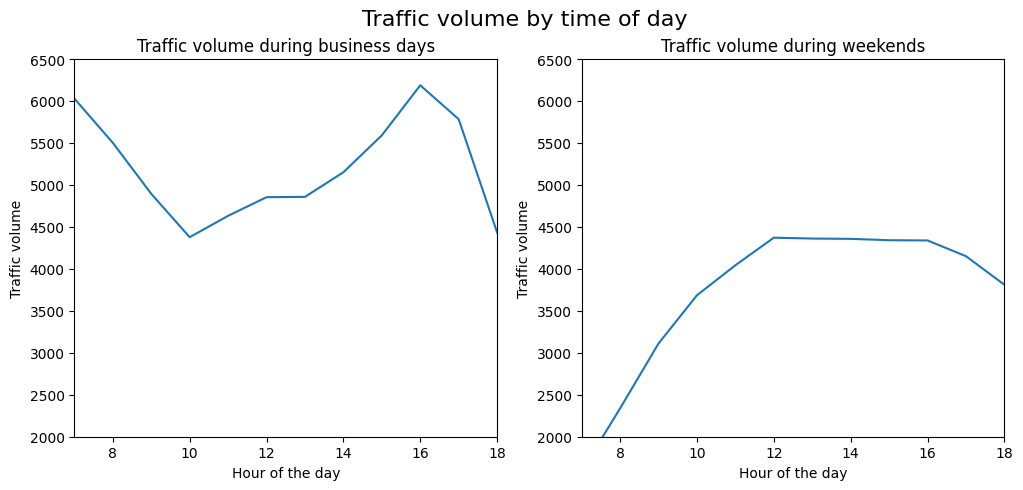

In [21]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
axs[0].plot(by_hour_business['traffic_volume'])
axs[0].set_xlabel('Hour of the day')
axs[0].set_ylabel('Traffic volume')
axs[0].set_title('Traffic volume during business days')
axs[1].plot(by_hour_weekend['traffic_volume'])
axs[1].set_xlabel('Hour of the day')
axs[1].set_ylabel('Traffic volume')
axs[1].set_title('Traffic volume during weekends')
for ax in axs:
    ax.set_xlim(7, 18)
    ax.set_ylim(2000, 6500)
fig.suptitle('Traffic volume by time of day', fontsize=16)
plt.show()

In [22]:
day_df.corr()['traffic_volume']

temp              0.128317
rain_1h           0.003697
snow_1h           0.001265
clouds_all       -0.032932
traffic_volume    1.000000
month            -0.022337
dayofweek        -0.416453
hour              0.172704
Name: traffic_volume, dtype: float64

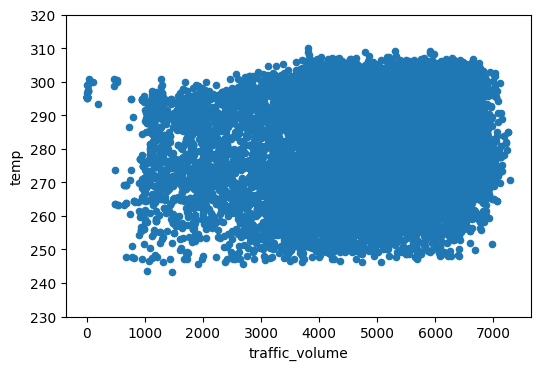

In [24]:
day_df.plot.scatter('traffic_volume', 'temp')
plt.ylim(230, 320)
plt.show()

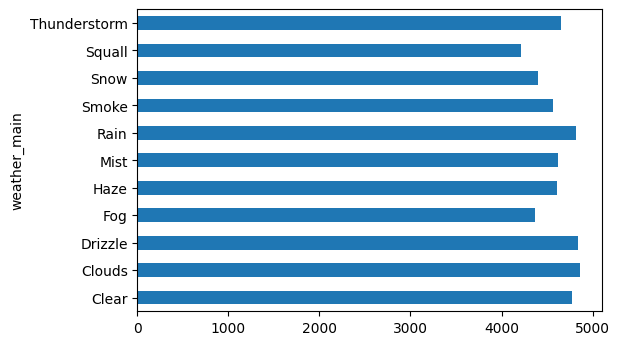

In [27]:
by_weather_main = day_df.groupby('weather_main').mean()
by_weather_main['traffic_volume'].plot.barh()
plt.show()

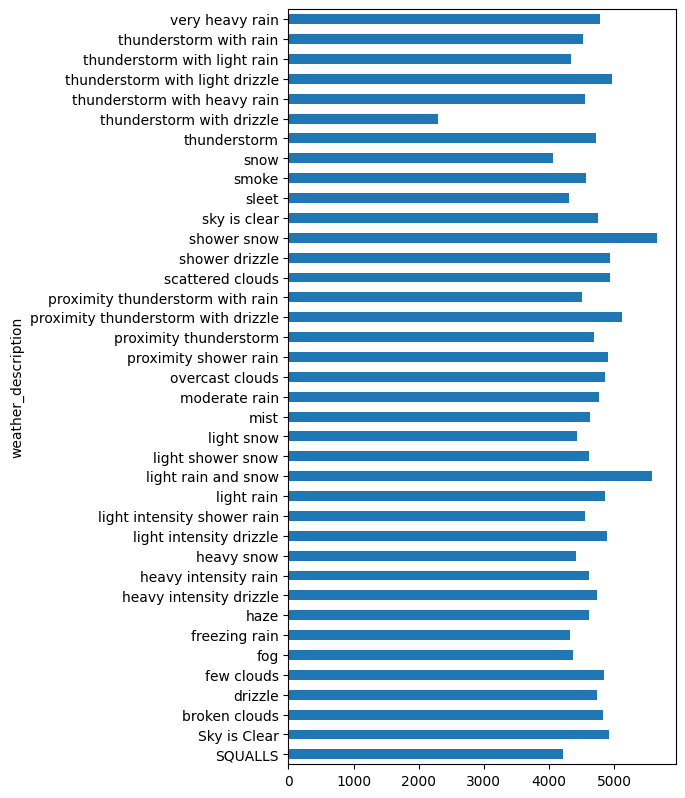

In [29]:
by_weather_description = day_df.groupby('weather_description').mean()
by_weather_description['traffic_volume'].plot.barh(figsize=(5,10))
plt.show()